# Задание 2

<div style="text-align: right"> 
    
    Домашнее задание II до 26/02/21 
    
    Широков Александр, ПМ-1701
    
    improfeo@yandex.ru
</div> 

## 01. 

1.	Написать функцию `prodIndices :: [Integer] -> [Int]`, которая по списку целых чисел выдает список индексов тех его элементов, которые являются произведениями двух соседних элементов (если один из соседних элементов отсутствует, то он полагается равным единице). 

Например, `prodIndices [1, -2, 6, -3, 0, 0]` должен выдать список `[2, 4, 5]`, поскольку элементы с индексами 2, 4 и 5 (и только они) являются произведениями соседних элементов: 6 = (-2)*(-3), 0 = (-3)*0, 0 = 0*1. 

В этом задании требуется по существу дела использовать функции высших порядков. Решения, основанные на чистой рекурсии без функций высших порядков будут оцениваться ниже.

In [1]:
-- prodIndices
    -- 1. [Integer] - список целых чисел
    -- 2. [Int] - список индексов
    
differences :: [Integer] -> [Integer]
differences (x:fs) = zipWith (*) (x:fs) (tail fs)

prodIndices :: [Integer] -> [Int]
prodIndices list = map fst $ 
                   filter (\(i, x) -> x == 0) $ 
                   zip [0..length list - 1] $ 
                   zipWith (-) (differences (1:list++[1])) list

In [2]:
prodIndices [1, -2, 6, -3, 0, 0]

[2,4,5]

In [3]:
prodIndices [1, 1, 1]

[0,1,2]

In [4]:
prodIndices [1, 1, 2]

[0]

In [5]:
prodIndices []

[]

## 02.

2.	Определите тип данных для представления **двоичного дерева поиска**

```haskell
data Tree key value = ..
```
для которого требуется реализовать стандартный набор методов для манипуляций с таким деревом:

1. ```haskell 
get :: Ord k => k -> Tree k v -> Maybe v  -- найти значение по ключу

2. ```haskell 
put :: Ord k => (k, v) -> Tree k v -> Tree k v -- добавить или заменить существующую пару <ключ,значение>

3. ```haskell 
remove :: Ord k => k -> Tree k v -> Tree k v -- удалить пару с заданным ключом

4. ```haskell 
keys :: Tree k v -> [k] -- выдать множество (список) всех ключей

5. ```haskell 
values :: Tree k v -> [v] -- выдать список всех значений

Еще одна функция, которую требуется реализовать, это

- ```haskell
pairsBy :: (k -> Bool) -> Tree k v -> [(k, v)] 

которая выдает множество тех пар отображения, ключи которых удовлетворяют критерию, заданному первым аргументом функции. Например, вызов `pairsBy (<0) t`  выдаст те пары отображения `m`, ключи которых меньше нуля.

Пусть вершины дерева занумерованы произвольным образом от $1$ до $n$. В каждой вершине будем хранить определённый *ключ*, который представляется целым числом. У вершин имеются *правый* и *левый* потомки. Поддерево с корнем в левом (правом) потомке данной вершины будем называть её левым (правым) *поддеревом*.

В двоичном дереве поиска ключи хранятся в соответствии со следующим правилом. Пусть $l$ и $r$ - номера вершин из левого и правого поддерева. Тогда: 

$$\text{key}[l] < \text{key}[i] < \text{key}[r]$$

Будем задавать двоичное дерево следующим образом.

```haskell
Empty | key (Tree key value) (Tree key value) value
```

- `key` - ключ в вершине
- `левое поддерево`
- `правое поддерево`
- `value` - значение в вершине

In [6]:
data Tree key value = Empty | 
                      Node key (Tree key value) (Tree key value) value

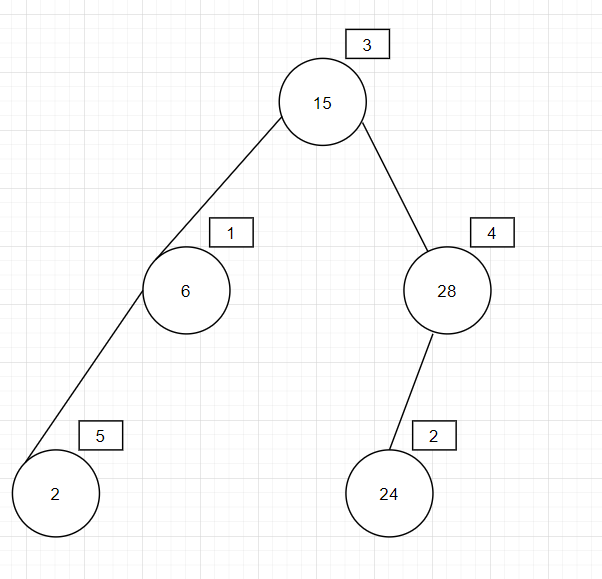

В кружках будем обозначать `key`, а `value` - значение.

In [7]:
myTree  :: Tree Int Int
myTree = Node 15 (Node 6 (Node 2 Empty Empty 5) Empty 1) (Node 28 (Node 24 Empty Empty 2) Empty 4 ) 3

- высота двоичного дерева поиска

In [8]:
height  ::  Tree key value -> Int
height Empty           =  0 -- если конструктором Empty, то 0
height (Node _ t1 t2 _)  =  1 + max (height t1) (height t2) -- если другим, то это

In [9]:
height myTree

3

1. ```haskell 
get :: Ord k => k -> Tree k v -> Maybe v  -- найти значение по ключу



In [10]:
get :: (Ord k) => k -> Tree k v -> v
get x Empty = error "No key in Binary Tree"
get x (Node key l r value)
    | x < key     = get x l --левое поддерево
    | x > key     = get x r --правое поддерево
    | otherwise = value

In [11]:
get 15 myTree

3

In [12]:
get 2 myTree

5

In [13]:
get 3 myTree

: 

2. ```haskell 
put :: Ord k => (k, v) -> Tree k v -> Tree k v -- добавить или заменить существующую пару <ключ,значение>


In [18]:
put :: Ord k => (k, v) -> Tree k v -> Tree k v
put (k, v) Empty = Node k Empty Empty v -- добавляем (k, v)
put (k, v) (Node key left right value)
    | k < key     = Node key (put (k, v) left) right value -- левое поддерево
    | k > key     = Node key left (put (k, v) right) value -- правое поддерево
    | otherwise = Node key left right v -- заменяем существующее значение

In [19]:
keys myTree

[15,6,2,28,24]

In [20]:
values myTree

[3,1,5,4,2]

In [21]:
let u = put (8, 7) myTree

In [22]:
keys u

[15,6,2,8,28,24]

In [23]:
values u

[3,1,5,7,4,2]

In [24]:
let w2 = put (27, 7) myTree

In [25]:
keys w2

[15,6,2,28,24,27]

In [26]:
values w2

[3,1,5,4,2,7]

3. ```haskell 
remove :: Ord k => k -> Tree k v -> Tree k v -- удалить пару с заданным ключом


In [27]:
remove :: Ord k => k -> Tree k v -> Tree k v
remove k Empty = error "Can't delete: No key in Binary Tree" -- нет ключа
remove k (Node key left right value)
    | k < key     = Node key (remove k left) right value -- левое поддерево
    | k > key     = Node key left (remove k right) value -- правое поддерево
    | otherwise = Node k Empty Empty value

In [28]:
let z = remove 28 myTree

In [29]:
keys z

[15,6,2,28]

In [30]:
values z

[3,1,5,4]

4. ```haskell 
keys :: Tree k v -> [k] -- выдать множество (список) всех ключей



In [14]:
keys :: Tree k v -> [k]
keys Empty = []
keys (Node key t1 t2 _)  =  key:keys t1++keys t2 -- рекурсивно в глубину обходим дерево, получая ключи

In [15]:
keys myTree

[15,6,2,28,24]

5. ```haskell 
values :: Tree k v -> [v] -- выдать список всех значений


In [16]:
values :: Tree k v -> [v]
values Empty = []
values (Node _ t1 t2 value)  =  value:values t1++values t2 -- рекурсивно в глубину обходим дерево, получая значения

In [17]:
values myTree

[3,1,5,4,2]

6. 

Еще одна функция, которую требуется реализовать, это

- ```haskell
pairsBy :: (k -> Bool) -> Tree k v -> [(k, v)] 

которая выдает множество тех пар отображения, ключи которых удовлетворяют критерию, заданному первым аргументом функции. Например, вызов `pairsBy (<0) t`  выдаст те пары отображения `m`, ключи которых меньше нуля.

In [31]:
pairsBy :: (k -> Bool) -> Tree k v -> [(k, v)] 
pairsBy _ Empty = []
pairsBy f (Node key left right value) | f key = (key, value):pairsBy f left++pairsBy f right -- проверям функцию
                                      | otherwise = pairsBy f left++pairsBy f right

In [32]:
keys myTree

[15,6,2,28,24]

In [33]:
pairsBy (<=3) myTree

[(2,5)]

In [34]:
pairsBy (>=6) myTree

[(15,3),(6,1),(28,4),(24,2)]

In [35]:
pairsBy (\x -> x `mod` 3 == 0) myTree

[(15,3),(6,1),(24,2)]